1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


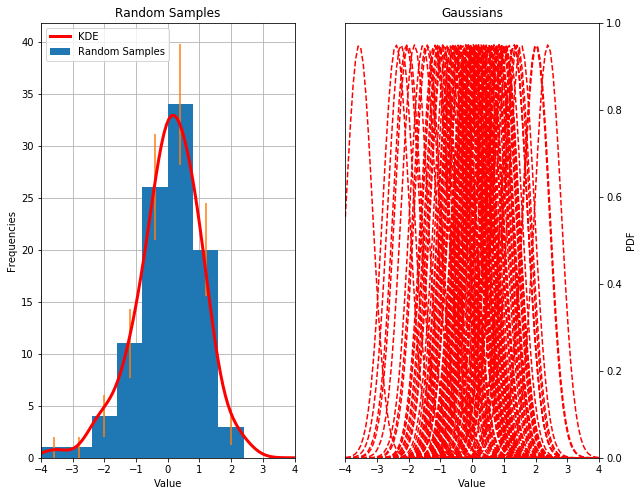

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
from matplotlib.ticker import MultipleLocator
from scipy.stats import norm

np.random.seed(1234)
x = np.random.randn(100)
y, bin_edges = np.histogram(x, bins=10, range=(-4,4)) # computing frequencies
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,8))

# histogram
ax1.grid(True)
ax1.hist(x, label='Random Samples', bins=10, range=(-4,4))
ax1.set_ylabel('Frequencies')
ax1.set_xlabel('Value')
ax1.set_title('Random Samples')
ax1.errorbar(bin_centers,y,yerr = np.sqrt(y),fmt = 'none') # adding errorbars

# generating gaussians
x_ax = np.linspace(-4,4,100)
gauss_sum = np.empty((100,100))
for i in range(x.size):
    gauss = norm.pdf(x_ax,x[i],1.06*x.std()*(x.size)**(-1/5))
    gauss_sum[i,:] = gauss
    ax2.plot(x_ax, gauss, 'r--')

ax2.set_xlim(-4,4)
ax2.set_ylim(0,1)
ax2.set_xlabel('Value')
ax2.set_title('Gaussians')
ax2.set_ylabel('PDF')
ax2.yaxis.set_label_position('right')
ax2.yaxis.tick_right()

# KDE
# summing gaussians and integral matching
gauss = np.sum(gauss_sum,axis=0) * sum(np.diff(bin_edges)*y) / np.trapz(np.sum(gauss_sum,axis=0),x=x_ax)
ax1.plot(x_ax,gauss,'r-',linewidth=3,label='KDE')
ax1.set_xlim(-4,4)
ax1.legend(loc='upper left')
ax1.set_axisbelow(True) # grid in background

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2018-11-28 11:27:08--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.1, 2620:100:6025:1::a27d:4501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [following]
--2018-11-28 11:27:09--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6b11af892a836d1fda54e07faf.dl.dropboxusercontent.com/cd/0/inline/AWdgcrS6v9imVIvTyqj7iTPB2nH7G-tCRnBhGLneuIopBmFzbNz1dfXmYiOKhFyMxbQ8HjDyeZHoCG1nHZ3EW78YdFaUTBqzExhwfWdcAXiz2UKf9YGtCZ3gZTfD-PCPQCT9xyr8f15y-_7zfGTFOQOS3lmQg8wozMdG34ug3tTTYFGwOwXgYBWsMjpVotizZlA/file [following]
--2018-11-28 11:27:09--  https://uc6b11af892a836d1fda54e07faf.dl.dropboxusercontent.com/cd/

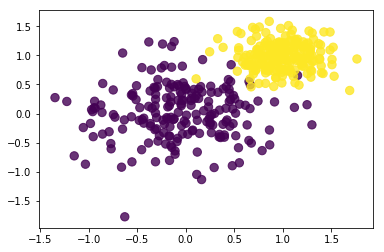

In [2]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')


/opt/ubuntu-16.04/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


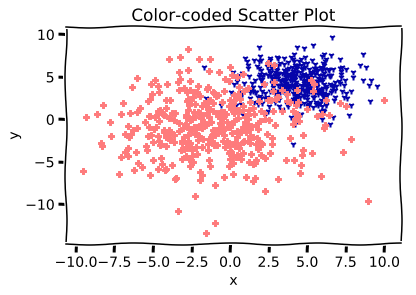

In [3]:
def generating_norm_dataset(n=2):
    """
    Returns n 2D normally distributed datasets with 400 points each
    """
    np.random.seed(12345)
    data = []
    for i in range(n):
        #pick random mean and std
        random_mean = np.random.uniform(low=-5,high=5)
        random_std  = np.random.uniform(low=-5,high=5)
        data.append(random_std * np.random.randn(400,2) + random_mean)
    return tuple(data)

data1, data2 = generating_norm_dataset()

#plotting
with plt.xkcd(): # xkcd :D
    plt.scatter(data1[:,0],data1[:,1],c='xkcd:royal blue',marker='1')
    plt.scatter(data2[:,0],data2[:,1],c='xkcd:salmon pink',marker='P')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Color-coded Scatter Plot')

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should you the `np.load()` function to load the file as a numpy array and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [36]:
! wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy


--2018-11-28 12:06:14--  https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6025:1::a27d:4501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/hgnvyj9abatk8g6/residuals_261.npy [following]
--2018-11-28 12:06:15--  https://www.dropbox.com/s/raw/hgnvyj9abatk8g6/residuals_261.npy
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7e8bdcb1a972ee6e3d3b2c8e9f.dl.dropboxusercontent.com/cd/0/inline/AWc12u6W18VaoF5S7vFOLDcISUf9aqxjIOAG4OynTm8rOjnUGPHsVN5U4n6604AJ4HLDZXVi6b8sjB5ewW-zssIlCFrgpmSpCKP6an3GixHmpuP2bimp9nr8zE8QH54yHQB1cv-OGPsbuWBbgETk0MzEoIqmE-tDDvvhJBDrNHxiVKZnn3ga-fSZuQkZ-ZpQWpg/file [following]
--2018-11-28 12:06:15--  https://uc7e8bdcb1a972ee6e3d3b2c8e9f.dl.dropboxusercontent.com/cd/0/inline/AWc12u6W18VaoF5S7vFOLDcISUf9aqxjI

Regression line: 0.577913366635926 10.025258299436526 0.043403510522559086 8.717037183576464e-06 0.1298980963225655


/opt/ubuntu-16.04/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


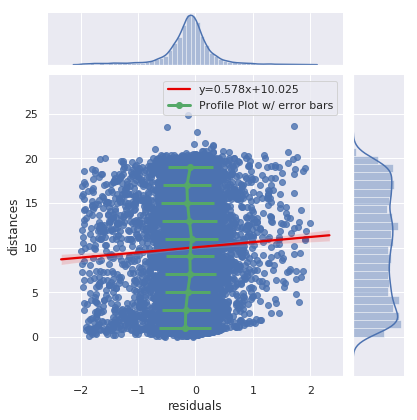

In [4]:
from scipy import stats

df = pd.DataFrame(np.load('residuals_261.npy').item()) # item it's required to avoid 0d array
#df.head() # inspect dataset
df_cleaned = df[np.abs(df['residuals']) < 2] # clean dataset
#print(df_cleaned)

# linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(df_cleaned['residuals'],df_cleaned['distances'])
print('Regression line:',slope, intercept, r_value, p_value, std_err)

# joint plot
sns.set(style="darkgrid", color_codes=True)
ax = sns.jointplot(x='residuals', y='distances', data=df_cleaned, kind='reg',
                   line_kws={'label':"y={0:.3f}x+{1:.3f}".format(slope,intercept),'color':sns.xkcd_rgb["red"]})

# profile plot
n_bins= 10
_ , x = np.histogram(df_cleaned['distances'],bins=n_bins, range=(0,20))
y    = np.empty(n_bins)
erry = np.empty(n_bins)
for i in range(n_bins):
    mask = (df_cleaned['distances'] > x[i]) & (df_cleaned['distances'] < x[i+1])
    temp = df_cleaned['residuals'][mask]
    y[i] = temp.mean()
    erry[i] = temp.std()

x = 0.5*(x[1:] + x[:-1])
plt.errorbar(y,x,xerr=erry, label='Profile Plot w/ error bars',linewidth=3,color='g',marker='o')
ax.ax_joint.legend()
plt.show()